In [79]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Ha

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_MotionCapture/
/V

In [9]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

In [47]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    c0 = np.array([0,0,0])/256
    c1 = np.array([150,0,0])/256
    c2 = np.array([0,0,100])/256
    c3 = np.array([0,100,0])/256

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4], ['Remote', 'Motion'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [11]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

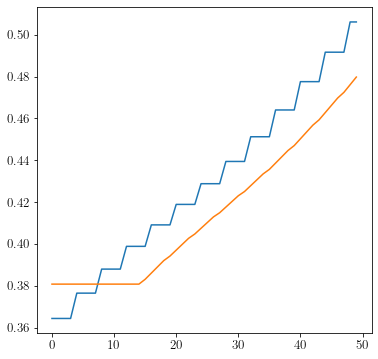

In [12]:
logs1 = logs.copy()

logs1['first remote'][0]['dronePositionFiltered.x'] = running_average(logs1['first remote'][0]['dronePosition.x'], 15)

plt.figure(figsize=(6,6))

plt.plot(logs1['first remote'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first remote'][0]['dronePositionFiltered.x'][0:50])

# Plot Trajectories

1758
2853
1816
1311
1382
1783
1583
713
3575
2078
1651
1058
552
1416
696
881
831
1593
1525
1570
836
1071
734
1646
1339
629
1464
731
631
1234
937
873
1517
547
576
828


2853

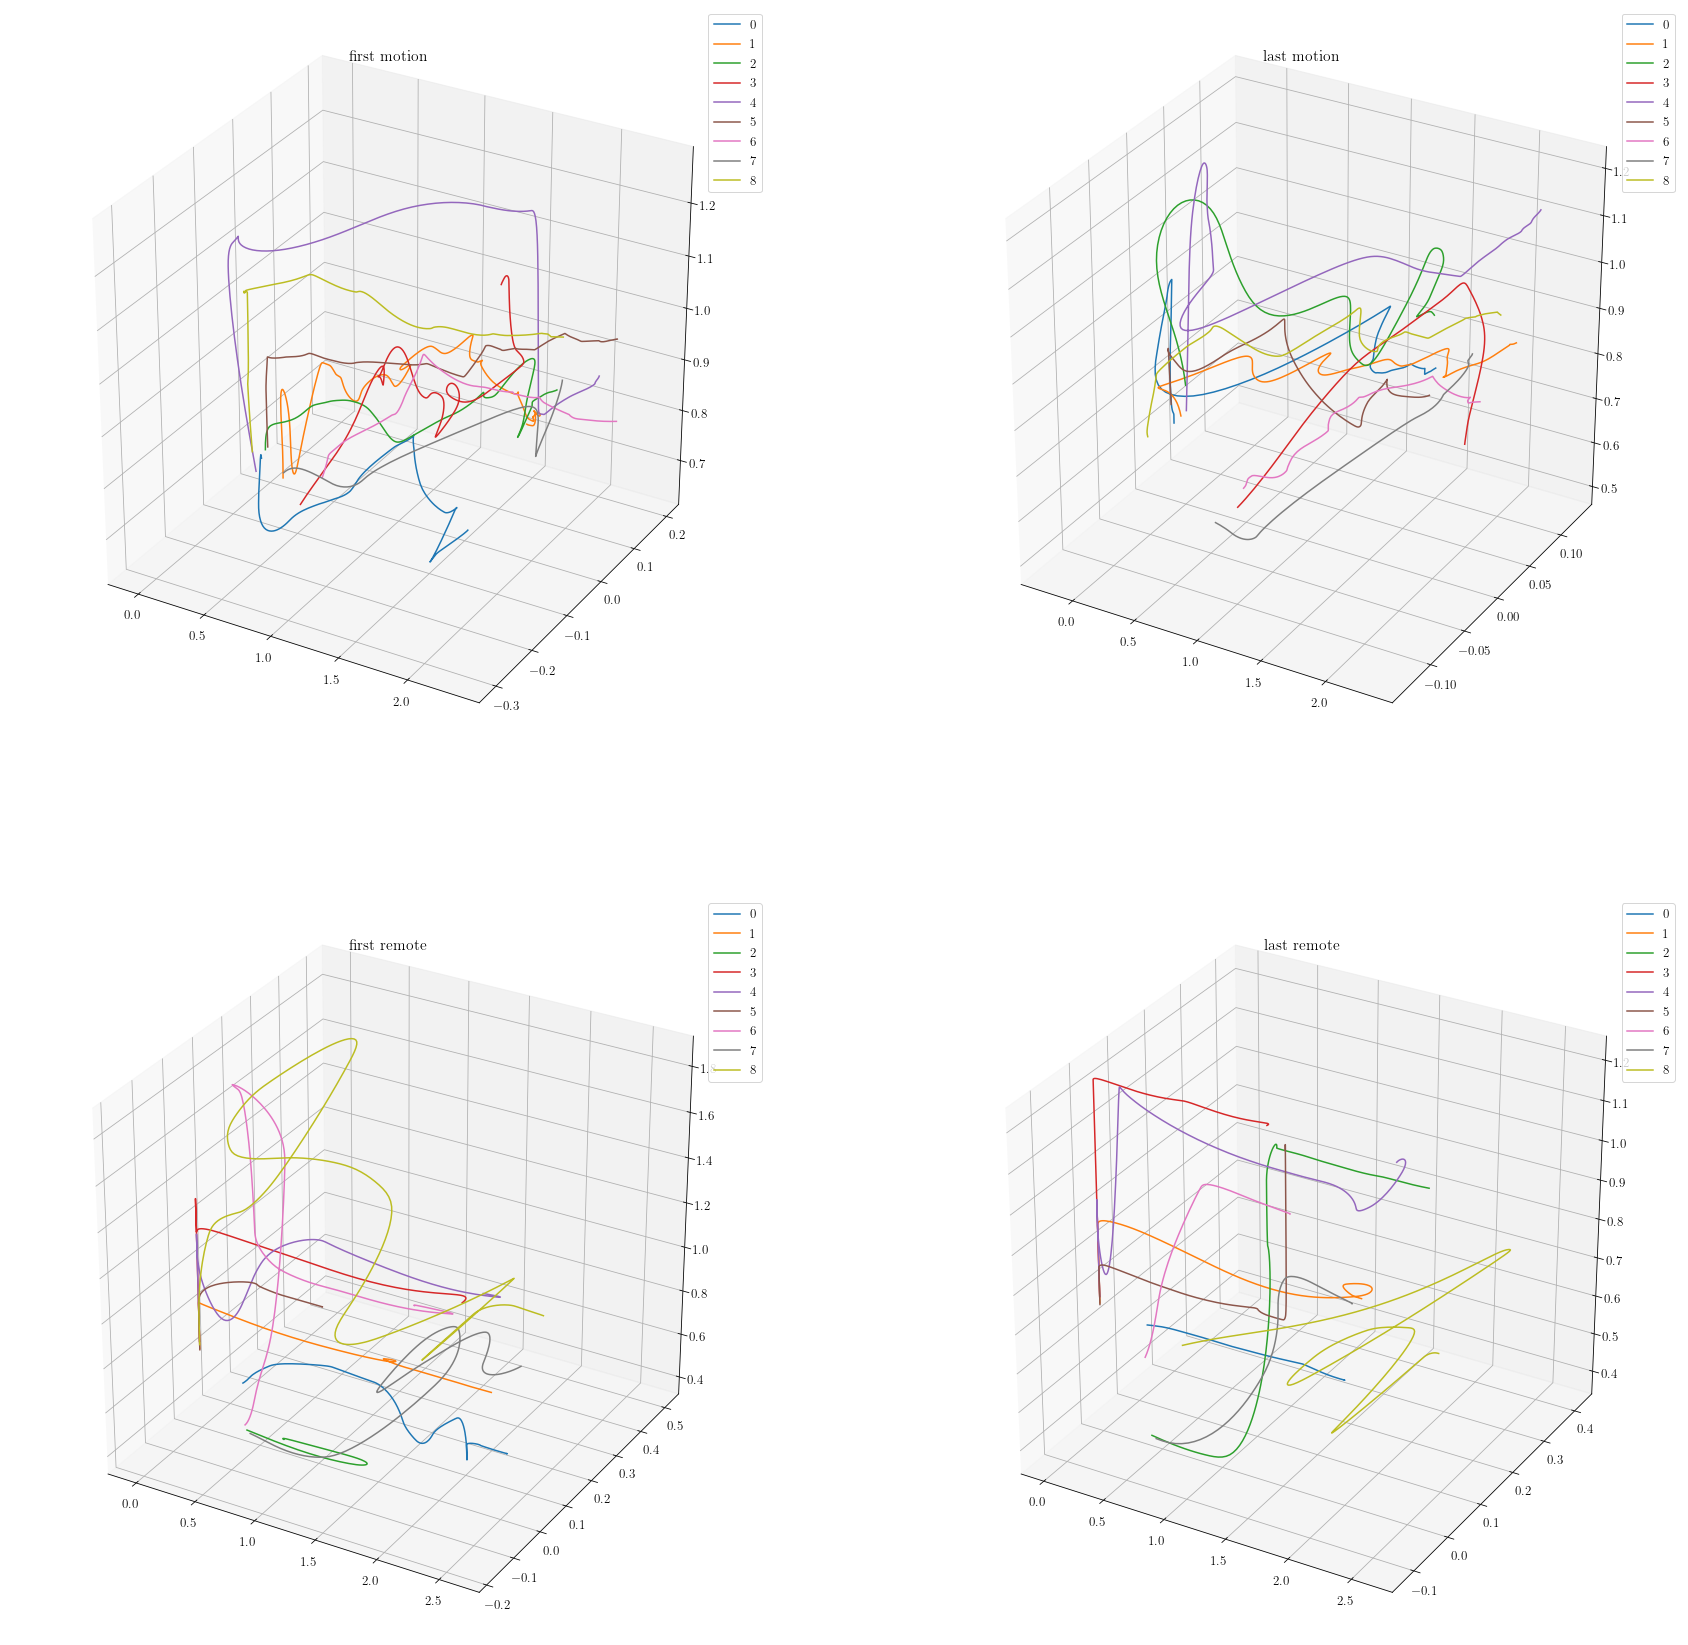

In [13]:

params = {
    'figure.figsize': [30, 30],

   }
mpl.rcParams.update(params)

plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label = str(idx1))
        print(len(log))
    plt.legend()
    plt.title(fields[idx])
#     define_plot_pos(ax)
len(logs['first motion'][1])

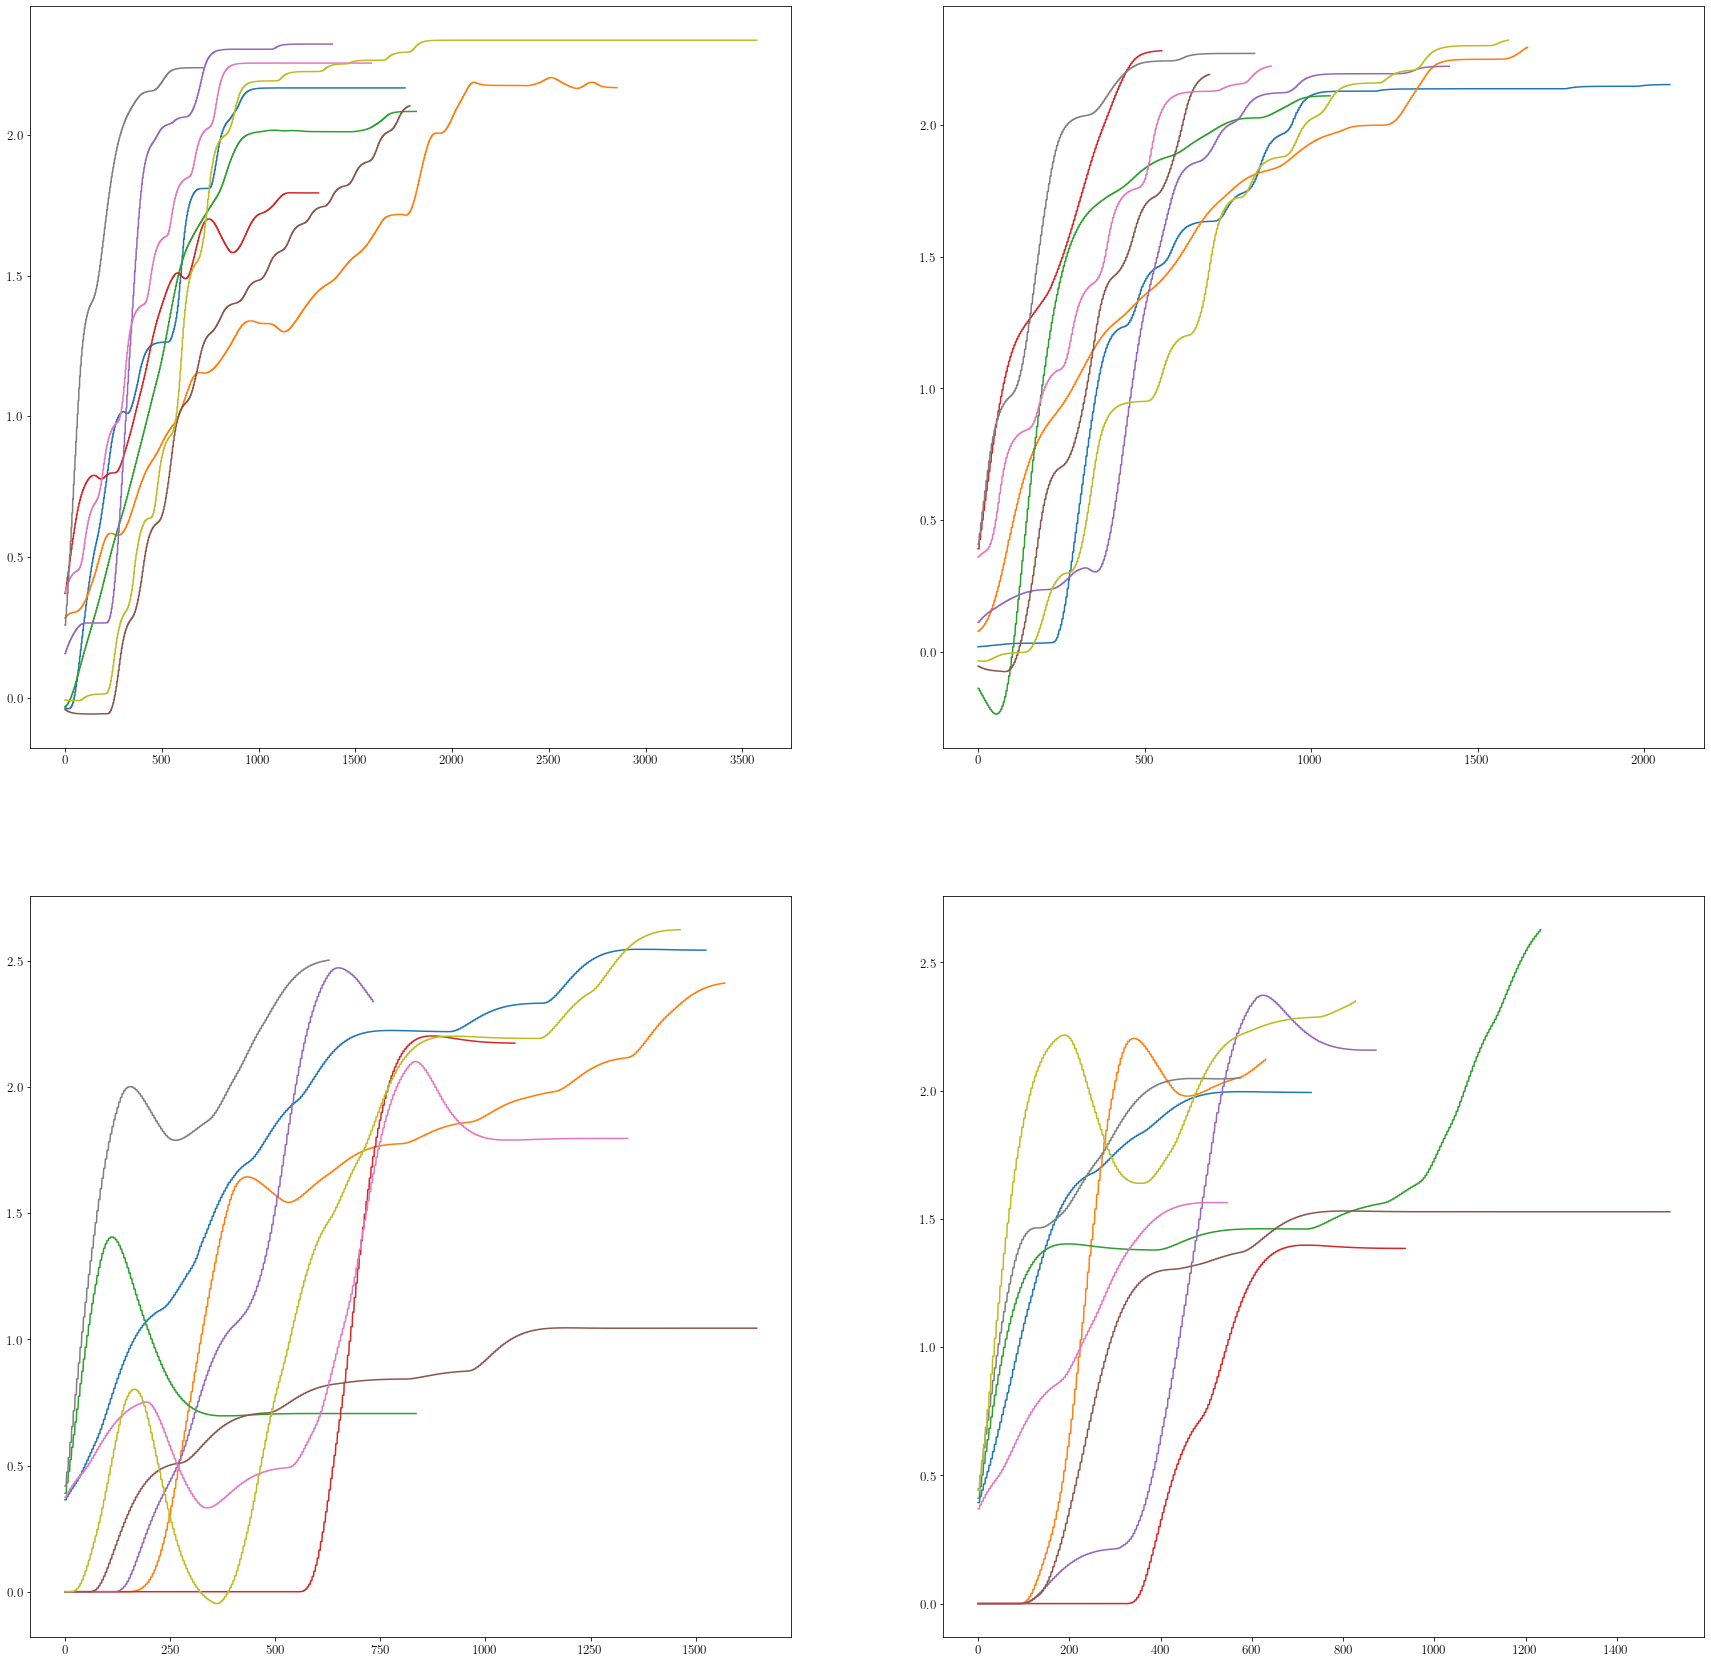

In [14]:
plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx)
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'])

# Time analysis

In [15]:
def compTime(df):
    return df['absoluteTime'].iloc[-1] - df['absoluteTime'].iloc[0]

In [16]:
time = runBasicAnalysis(compTime)

first motion
[22.000301361083984, 35.6507511138916, 22.687667846679688, 16.400043487548828, 17.26307487487793, 22.275915145874023, 19.775474548339844, 8.901359558105469, 44.70053195953369]
mean =  23.29501332177056
std =  10.096388273407083

last motion
[26.01287841796875, 20.62602996826172, 13.213340759277344, 6.900917053222656, 17.689041137695312, 8.688880920410156, 11.001197814941406, 10.375823974609375, 19.928115844726562]
mean =  14.93735843234592
std =  6.059048323375995

first remote
[19.08771324157715, 19.612783432006836, 10.439125061035156, 13.375783920288086, 9.163229942321777, 20.562975883483887, 16.725953102111816, 7.8533172607421875, 18.28772735595703]
mean =  15.012067688835991
std =  4.6104138497806755

last remote
[9.1253662109375, 7.89990234375, 15.41375732421875, 11.700714111328125, 10.901214599609375, 18.951248168945312, 6.826324462890625, 7.1886138916015625, 10.350059509277344]
mean =  10.928577846950954
std =  3.7808282659006567

first motion last motion
p = 0.0850

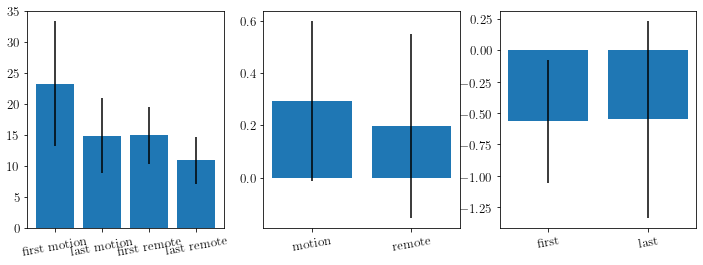

In [17]:
basic_plot(time)

# Distance Analysis

In [18]:
def compDist(df):
    
    steps = 10
    
    df['dronePositionFiltered.x'] = running_average(df['dronePosition.x'], steps)
    df['dronePositionFiltered.y'] = running_average(df['dronePosition.y'], steps)
    df['dronePositionFiltered.z'] = running_average(df['dronePosition.z'], steps)
    
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    dd = np.sqrt(dx**2+dy**2+dz**2)
    d = np.sum(dd)

    return d

In [19]:
dist = runBasicAnalysis(compDist)

first motion
[2.4079818339697163, 2.589088615583021, 2.3807381278346518, 2.34209367863503, 2.9097465762959063, 2.3635212335860274, 1.965975510513525, 2.125941518099629, 2.6865766369448583]
mean =  2.419073747940262
std =  0.26730171373857303

last motion
[2.537021508613696, 2.3530818200486134, 2.8958131199268005, 2.012719263035822, 2.778885406877052, 2.459157604389951, 1.9273239175408416, 1.9108057002909558, 2.5060811043893576]
mean =  2.3756543827903434
std =  0.33870661888009745

first remote
[2.5359704352969734, 2.8140259306016637, 1.706158671744957, 3.8467200680448883, 3.458773606587388, 1.2997789576384269, 4.497230364702236, 3.0520839413484175, 6.240497171917577]
mean =  3.2723599053202808
std =  1.4071132396834458

last remote
[1.5860944968702624, 2.769962968170846, 2.789911849585029, 1.9406195586416692, 3.4077103178378767, 2.0583567717297315, 1.3816162455110068, 1.7679396142128745, 3.737611905224182]
mean =  2.3822026364203865
std =  0.7829812884541837

first motion last motion


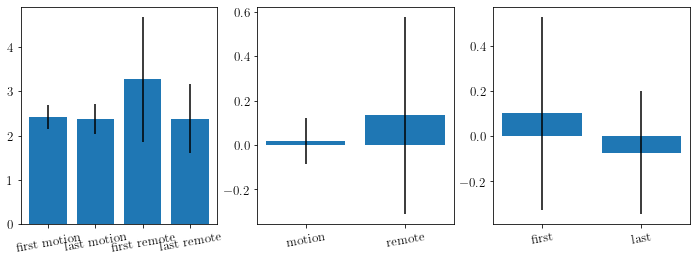

In [20]:
basic_plot(dist)

# Velocity Analysis

In [21]:
def compVel(df):
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values
    t = df['absoluteTime'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    dt = np.diff(t)
    
    vx = np.append([0],dx/dt)
    vy = np.append([0],dy/dt)
    vz = np.append([0],dz/dt)
    
    df['droneVelocity.x'] = vx
    df['droneVelocity.y'] = vy
    df['droneVelocity.z'] = vz
    
    steps = 20    
    
    df['droneVelocityFiltered.x'] = running_average(df['droneVelocity.x'], steps)
    df['droneVelocityFiltered.y'] = running_average(df['droneVelocity.y'], steps)
    df['droneVelocityFiltered.z'] = running_average(df['droneVelocity.z'], steps)

    dv = np.sqrt(df['droneVelocityFiltered.x'][100:]**2+df['droneVelocityFiltered.y'][100:]**2+df['droneVelocityFiltered.z'][100:]**2)
    
    v = np.mean(dv)
    
    return v

In [22]:
vel = runBasicAnalysis(compVel)

first motion
[0.10356964655114388, 0.06955170680514791, 0.10250299476579317, 0.12814738954785856, 0.15179257308665622, 0.10765755547918565, 0.09936345448087222, 0.15394272870646528, 0.0583970663340777]
mean =  0.10832501286191118
std =  0.030725966121216277

last motion
[0.09504662526397992, 0.10193713652535251, 0.20570379545202452, 0.23172362901754426, 0.1403648760316041, 0.31330257404188055, 0.15795292771784286, 0.15253748742827716, 0.1282409083921387]
mean =  0.1696455510967383
std =  0.06577888869259117

first remote
[0.12508722048790424, 0.14349253908992596, 0.08859035488010596, 0.2779625152990717, 0.37477132244502787, 0.053293900461312396, 0.2618872986360224, 0.2810607660181142, 0.32222582414980566]
mean =  0.21426352682969896
std =  0.1069122065121567

last remote
[0.13049774904734512, 0.38729665948301834, 0.14181825218290417, 0.16189093470720572, 0.32532539267694327, 0.11141940765180677, 0.175603666610264, 0.14184695139941342, 0.26878521131436883]
mean =  0.20494269167480775
st

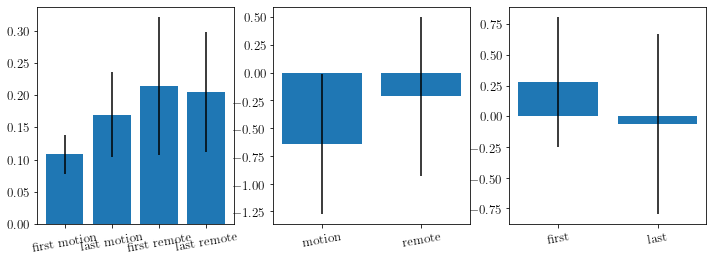

In [23]:
basic_plot(vel)

# Acceleration Analysis

In [24]:
def compAcc(df):
    vx = df['droneVelocityFiltered.x'].values
    vy = df['droneVelocityFiltered.y'].values
    vz = df['droneVelocityFiltered.z'].values
    t = df['absoluteTime'].values
    
    dvx = np.diff(vx)
    dvy = np.diff(vy)
    dvz = np.diff(vz)
    dt = np.diff(t)
    
    ax = np.append([0],dvx/dt)
    ay = np.append([0],dvy/dt)
    az = np.append([0],dvz/dt)
    
    df['droneAcceleration.x'] = ax
    df['droneAcceleration.y'] = ay
    df['droneAcceleration.z'] = az
    
    steps = 30    
    
    df['droneAccelerationFiltered.x'] = running_average(df['droneAcceleration.x'], steps)
    df['droneAccelerationFiltered.y'] = running_average(df['droneAcceleration.y'], steps)
    df['droneAccelerationFiltered.z'] = running_average(df['droneAcceleration.z'], steps)

    da = np.sqrt(df['droneAccelerationFiltered.x'][100:]**2+df['droneAccelerationFiltered.y'][100:]**2+df['droneAccelerationFiltered.z'][100:]**2)
    
    a = np.mean(da)

    return a

In [25]:
acc = runBasicAnalysis(compAcc)

first motion
[0.17393285940636483, 0.0969256037186948, 0.06596567306404282, 0.21592292494618068, 0.22578687860892116, 0.1875843199300657, 0.22094423966490281, 0.2520952497977581, 0.1190573252901416]
mean =  0.17313500826967473
std =  0.06105591456769086

last motion
[0.16294241796173092, 0.08938090680498667, 0.22004080637382778, 0.21142379182007437, 0.18324244527714373, 0.4849407815073241, 0.37570676261236546, 0.2047415694642193, 0.2602140071166994]
mean =  0.2436259432153746
std =  0.11205460919700326

first remote
[0.1331262110352601, 0.1492487004988407, 0.17349094315566704, 0.3242996240125836, 0.48232448649737336, 0.06830508804109818, 0.27261257175498554, 0.5167404241534947, 0.42089275544042826]
mean =  0.28233786717663684
std =  0.1540658452750956

last remote
[0.09919674509577121, 0.49131536528690145, 0.13747411679689114, 0.17280731451646758, 0.3699748028856125, 0.110848200739615, 0.15069045936439093, 0.21491070917790808, 0.4434245451645622]
mean =  0.24340469544756893
std =  0.14

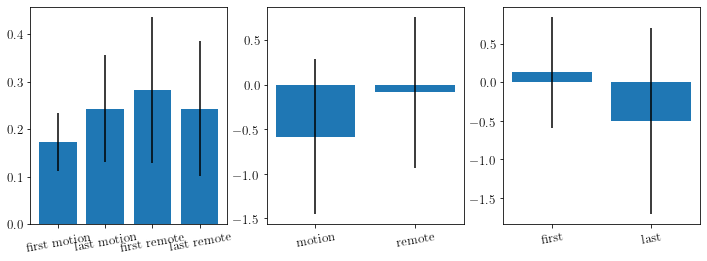

In [26]:
basic_plot(acc)

# Jerk Analysis

In [27]:
def compJerk(df):
    ax = df['droneAccelerationFiltered.x'].values
    ay = df['droneAccelerationFiltered.y'].values
    az = df['droneAccelerationFiltered.z'].values
    t = df['absoluteTime'].values
    
    dax = np.diff(ax)
    day = np.diff(ay)
    daz = np.diff(az)
    dt = np.diff(t)
    
    jx = np.append([0],dax/dt)
    jy = np.append([0],day/dt)
    jz = np.append([0],daz/dt)
    
    df['droneJerk.x'] = jx
    df['droneJerk.y'] = jy
    df['droneJerk.z'] = jz
    
    steps = 40    
    
    df['droneJerkFiltered.x'] = running_average(df['droneJerk.x'], steps)
    df['droneJerkFiltered.y'] = running_average(df['droneJerk.y'], steps)
    df['droneJerkFiltered.z'] = running_average(df['droneJerk.z'], steps)

    dj = np.sqrt(df['droneJerkFiltered.x'][100:]**2+df['droneJerkFiltered.y'][100:]**2+df['droneJerkFiltered.z'][100:]**2)
    
    
    j = np.mean(dj)

    return j

In [28]:
jerk = runBasicAnalysis(compJerk)

first motion
[0.5171427058429543, 0.24134279638847914, 0.17198254678218716, 0.5222688094425266, 0.5670575858906604, 0.6140193575741348, 0.7741117902798014, 0.6360789837836841, 0.39699313498479777]
mean =  0.4934441901076917
std =  0.18155631951683765

last motion
[0.49472332110432865, 0.21906795063752965, 0.44289976548623783, 0.3917727154447385, 0.4733261591658108, 1.2782924426435958, 1.369431913866224, 0.580633790712421, 0.802122094037776]
mean =  0.672474461455407
std =  0.37805633379966547

first remote
[0.3161407584489092, 0.31258231458205277, 0.32446444829705057, 0.5428048635775521, 0.9054761828410188, 0.1627988972413741, 0.541713736929568, 1.0844700997555508, 0.9002413079906113]
mean =  0.5656325121848541
std =  0.30631499988652644

last remote
[0.19620700796278914, 0.8973295313413955, 0.316988781493281, 0.431903653483512, 0.7389007484128811, 0.18810131404292535, 0.3198207990274152, 0.46115476937489774, 0.8408708784755131]
mean =  0.48791972040162335
std =  0.25636314709381736

f

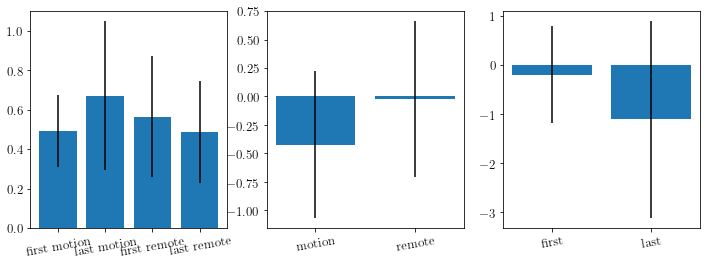

In [29]:
basic_plot(jerk)

# Energy Analysis

In [30]:
def compEnergy(df):
    df['controlInput'] = np.sqrt(df['controlSpeed.x']**2+df['controlSpeed.y']**2+df['controlSpeed.z']**2)
    return df['controlInput'].sum()

In [31]:
energy = runBasicAnalysis(compEnergy)

first motion
[243.1243274890345, 209.67771422483904, 182.5504702478879, 167.2975429030427, 184.51269910999892, 205.61325191221215, 166.5333961262464, 143.7685119150633, 230.0204222347014]
mean =  192.56648179589183
std =  30.33987565135345

last motion
[219.9021565260263, 185.40862029799382, 200.24628364926318, 129.3448655033684, 188.11639367871484, 204.31705961678563, 177.2660484036241, 128.15265932388925, 227.667539651227]
mean =  184.49129185009917
std =  33.40118992684115

first remote
[167.1979504516408, 224.3749082996611, 125.68073888091487, 180.50981499930447, 223.24627076089996, 83.8546771183392, 237.86760314741616, 232.62020587336923, 506.4204926383469]
mean =  220.1969624633214
std =  112.70598500266445

last remote
[110.96964001135002, 232.68918908388008, 156.65052315704526, 113.66020574717948, 224.97132845777475, 123.80334830008707, 86.08801014069732, 104.28704269370274, 292.273913181941]
mean =  160.59924453040642
std =  67.85428273704566

first motion last motion
p = 0.75

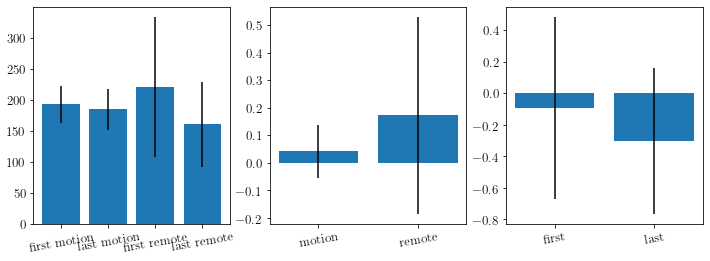

In [32]:
basic_plot(energy)

# Power Analysis

In [33]:
def compDEnergy(df):
    dEnergy = np.abs(np.diff(df['controlInput']))
    return np.sum(dEnergy)

In [34]:
dEnergy = runBasicAnalysis(compDEnergy)

first motion
[29.740507525759536, 6.408908345817616, 3.011200478523178, 4.2531375082289316, 7.047980638370889, 14.367038371975955, 21.568799868958713, 5.19646988769114, 26.286604822390498]
mean =  13.09784971641294
std =  9.70700342334248

last motion
[25.731530838678985, 3.5160005296965426, 4.184471892047005, 1.817230842629951, 7.998243510928208, 11.415171872347182, 24.55039350654947, 5.896651601564039, 25.085000019790307]
mean =  12.243854957136854
std =  9.469869233167747

first remote
[5.862128287699369, 4.784604734042387, 2.944573632369693, 3.2865052461857482, 8.19942913204454, 2.8915054315485915, 6.929296547648825, 5.799248532667786, 14.182745793367136]
mean =  6.0977819263971185
std =  3.3411620652324814

last remote
[3.526863916456883, 5.173738725483439, 4.515315918861191, 3.09001936149437, 6.918121151790032, 3.3341862238187177, 2.5000987728126547, 3.3761062468402017, 7.434161298482252]
mean =  4.429845735115527
std =  1.647333851867725

first motion last motion
p = 0.691102223

<BarContainer object of 2 artists>

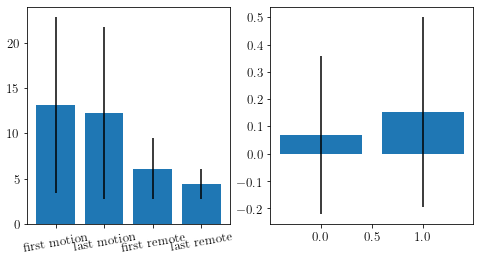

In [35]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   dEnergy['means'],
   yerr=dEnergy['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(dEnergy['diff mot']), np.mean(dEnergy['diff rem'])],
   yerr=[np.std(dEnergy['diff mot']), np.std(dEnergy['diff rem'])])

# Collision Analysis

In [36]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/Bidir - haptics X collisions - Sheet1.csv')
coll_df

,Index,Run,Subject,Interface,Collided
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,96.0,1.0,10.0,Remote,1.0
96,97.0,2.0,10.0,Remote,0.0
97,98.0,3.0,10.0,Remote,1.0
98,99.0,4.0,10.0,Remote,0.0


In [37]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
print(coll['motion'])
print(coll['remote'])

    Index  Run  Subject Interface  Collided
10   11.0  1.0      2.0    Motion       0.0
11   12.0  2.0      2.0    Motion       0.0
12   13.0  3.0      2.0    Motion       0.0
13   14.0  4.0      2.0    Motion       0.0
14   15.0  5.0      2.0    Motion       0.0
20   21.0  1.0      3.0    Motion       0.0
21   22.0  2.0      3.0    Motion       0.0
22   23.0  3.0      3.0    Motion       0.0
23   24.0  4.0      3.0    Motion       0.0
24   25.0  5.0      3.0    Motion       0.0
30   31.0  1.0      4.0    Motion       0.0
31   32.0  2.0      4.0    Motion       0.0
32   33.0  3.0      4.0    Motion       0.0
33   34.0  4.0      4.0    Motion       1.0
34   35.0  5.0      4.0    Motion       0.0
40   41.0  1.0      5.0    Motion       0.0
41   42.0  2.0      5.0    Motion       1.0
42   43.0  3.0      5.0    Motion       0.0
43   44.0  4.0      5.0    Motion       0.0
44   45.0  5.0      5.0    Motion       0.0
50   51.0  1.0      6.0    Motion       0.0
51   52.0  2.0      6.0    Motio


consider all runs

mean motion =  0.4444444444444444
std motion =  0.4969039949999533
mean remote =  1.8888888888888888
std remote =  0.9938079899999066

total motion =  4.0
total remote =  17.0

p = 0.0023307281594675327 !!!!!!!!!!

consider first runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.5555555555555556
std remote =  0.4969039949999533

total motion =  0.0
total remote =  5.0

p = 0.010556660425736162 !!!!!!

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.3333333333333333
std remote =  0.4714045207910317

total motion =  0.0
total remote =  3.0

p = 0.06519641907813 !


Text(0.5, 1.0, 'Collisions - last run')

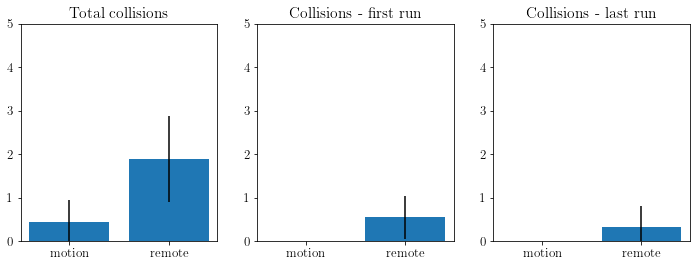

In [60]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

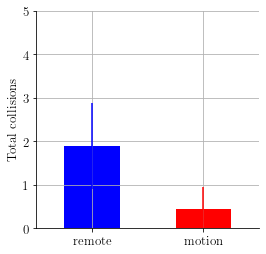

In [94]:

c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Approach wall Analysis

In [39]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [40]:
x_max = runHapticsAnalysis(comp_max_dist)

motion
[2.166543960571289, 2.3427584171295166, 2.3182642459869385, 2.6193010807037354, 2.1527178287506104, 2.203144073486328, 2.172031879425049, 2.367964267730713, 2.2921621799468994, 2.2938807010650635, 2.0830440521240234, 2.3672471046447754, 2.1614696979522705, 2.3489859104156494, 2.1100220680236816, 1.7940592765808105, 2.562236785888672, 2.2595462799072266, 2.438251256942749, 2.281041145324707, 2.32242751121521, 2.406738758087158, 2.179379463195801, 2.3031210899353027, 2.222109794616699, 2.102964162826538, 2.135408878326416, 2.1898622512817383, 2.2468628883361816, 2.1908209323883057, 2.2549567222595215, 2.3733744621276855, 2.2341959476470947, 2.368077039718628, 2.223067283630371, 2.2383840084075928, 2.3013014793395996, 2.1632609367370605, 2.2235822677612305, 2.2708401679992676, 2.336261749267578, 2.345310688018799, 2.409379482269287, 2.3194692134857178, 2.3210558891296387]
mean =  2.267041895124647
std =  0.131088157209038

remote
[2.5452990531921387, 2.35636305809021, 2.44672036170

In [41]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider


motion remote
p = 0.013680226226984397 !!!!!!


Text(0.5, 1.0, 'Distances')

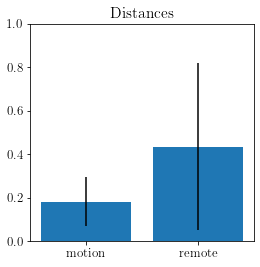

In [42]:
distances = {}

for i in interfaces:
    distances[i] = x_collision - np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1],
   [np.mean(distances['motion']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['remote'])])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

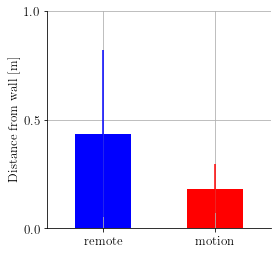

In [93]:
c1 = 'b'
c2 = 'r'

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 2.5])
plt.ylabel('Distance from wall [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('distances_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>